# Brinson Model and Portfolio Attribution
**Franklin Ma**   
Referrence: *Performance Attribution for Equity Portfolios*, Y. Lu and D. Kane, Dec 20, 2013 

## 1. Introduction

Portfolio active return is the difference between the portfolio return and the benchmark return. We want to know what causes this active return and portfolio attribution decomposes active return.    

There are two approaches:    
1. Brinson Model: a ANOVA-type approach decomposes the return into asset allocation, stock selection, and interaction effects.   
2. Regression: use linear regression estimated coefficients to attribute returns to different factors

NOTE: Brinson Model is a special case of regression-based approach.

## 2. Data

This paper is based on real-world data provided by MSCI Barra's Global Equity Model II (GEM2)

In [1]:
version
options(warn = -1)

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          1.2                         
year           2014                        
month          10                          
day            31                          
svn rev        66913                       
language       R                           
version.string R version 3.1.2 (2014-10-31)
nickname       Pumpkin Helmet              

In [13]:
install.packages("pa", repos = 'http://cran.us.r-project.org')

Installing package into 'C:/Users/Franklin Ma/Documents/R/win-library/3.1'
(as 'lib' is unspecified)


In [2]:
library(pa)

Loading required package: grid


In [7]:
data(year)
print(names(year))

 [1] "barrid"    "name"      "return"    "date"      "sector"    "momentum" 
 [7] "value"     "size"      "growth"    "cap.usd"   "yield"     "country"  
[13] "currency"  "portfolio" "benchmark"


In [14]:
head(year, 5)

,barrid,name,return,date,sector,momentum,value,size,growth,cap.usd,yield,country,currency,portfolio,benchmark
43581,USAQGY1,TRANSOCEAN LTD,0.02343,2010-01-01,Energy,-0.052,1.057,0.25,0.972,27206115960,0,USA,USAC,0,0.001258704
25345,NORAWZ1,SEADRILL,-0.07905,2010-01-01,Energy,1.757,0.524,-0.265,1.233,9230745025,2.162,NOR,NORC,0,0.0004270648
25441,NORWAA1,SEADRILL (GER-LISTING),-0.08667,2010-01-01,Energy,1.757,0.524,-0.265,1.233,9120504511,2.162,NOR,NORC,0,0.0004219644
45326,USAV8C1,DIAMOND OFFSHORE DRILLING INC,-0.07001,2010-01-01,Energy,0.382,0.394,-0.281,1.105,12723036120,0.546,USA,USAC,0,0.0005886373
46015,USAWY11,NATIONAL OILWELL VARCO INC,-0.07235,2010-01-01,Energy,0.629,0.394,-0.074,1.317,17104339100,0.978,USA,USAC,0,0.0007913403


In [17]:
dim(year)

[1] 36000    15

The portfolio has 200 equal-weighted holdings. The row for Canadian Imperial Bank of Commerce indicates that it is one of the 200 portfolio holdings with a weight of 0.5% in 2010. Its return was 2.61% in August, and almost at in November.

## 3 Brinson Model
### 3.1 Single-Period Brinson Model

Consider a portfolio manager who uses S&P 500 as a benchmark. In a given month, she outperformed S&P 500 by 6%. This return premium is due to **3 parts**:

**1. Allocation Effect: She allocates more weight to certain sectors that perform better than S&P 500.**   
**2. Selecttion Effect: She selects stocks that perform better than the stocks in the same sector.**   
**3. Interaction Effect: Interaction between allocation effect and selection effect.**

$ R_allocation = \sum W_j^P R_j^B - \sum W_j^B R_j^B$ (Allocation Effect)    
$ R_selection = \sum W_j^B R_j^P - \sum W_j^B R_j^B$ (Selection Effect)     
$ R_interaction = R_active - R_allocation - R_selection$

### 3.2 Weekness of Brinson Model

As the number of categories increase, the Brinson Model will subject to the *curse of dimensionality*. 

In [8]:
data(jan)
head(jan, 5)

,barrid,name,return,date,sector,momentum,value,size,growth,cap.usd,yield,country,currency,portfolio,benchmark
43581,USAQGY1,TRANSOCEAN LTD,0.02343,2010-01-01,Energy,-0.052,1.057,0.25,0.972,27206115960,0,USA,USAC,0,0.001258704
25345,NORAWZ1,SEADRILL,-0.07905,2010-01-01,Energy,1.757,0.524,-0.265,1.233,9230745025,2.162,NOR,NORC,0,0.0004270648
25441,NORWAA1,SEADRILL (GER-LISTING),-0.08667,2010-01-01,Energy,1.757,0.524,-0.265,1.233,9120504511,2.162,NOR,NORC,0,0.0004219644
45326,USAV8C1,DIAMOND OFFSHORE DRILLING INC,-0.07001,2010-01-01,Energy,0.382,0.394,-0.281,1.105,12723036120,0.546,USA,USAC,0,0.0005886373
46015,USAWY11,NATIONAL OILWELL VARCO INC,-0.07235,2010-01-01,Energy,0.629,0.394,-0.074,1.317,17104339100,0.978,USA,USAC,0,0.0007913403


In [11]:
br.single <- brinson(x = jan, date.var = "date", cat.var = "sector",
bench.weight = "benchmark", portfolio.weight = "portfolio", ret.var =
"return")

In [12]:
summary(br.single)

Period:                              2010-01-01
Methodology:                         Brinson
Securities in the portfolio:         200
Securities in the benchmark:         1000

Exposures 
            Portfolio Benchmark     Diff
Energy          0.085    0.2782 -0.19319
Materials       0.070    0.0277  0.04230
Industrials     0.045    0.0330  0.01201
ConDiscre       0.050    0.0188  0.03124
ConStaples      0.030    0.0148  0.01518
HealthCare      0.015    0.0608 -0.04576
Financials      0.370    0.2979  0.07215
InfoTech        0.005    0.0129 -0.00787
TeleSvcs        0.300    0.1921  0.10792
Utilities       0.030    0.0640 -0.03399

Returns 
$`Attribution by category in bps`
            Allocation Selection Interaction
Energy         110.934    -37.52      26.059
Materials      -41.534      0.48       0.734
Industrials      0.361      1.30       0.473
ConDiscre      -28.688     -4.23      -7.044
ConStaples       5.467     -3.59      -3.673
HealthCare      -6.692     -4.07       3.063
Fi

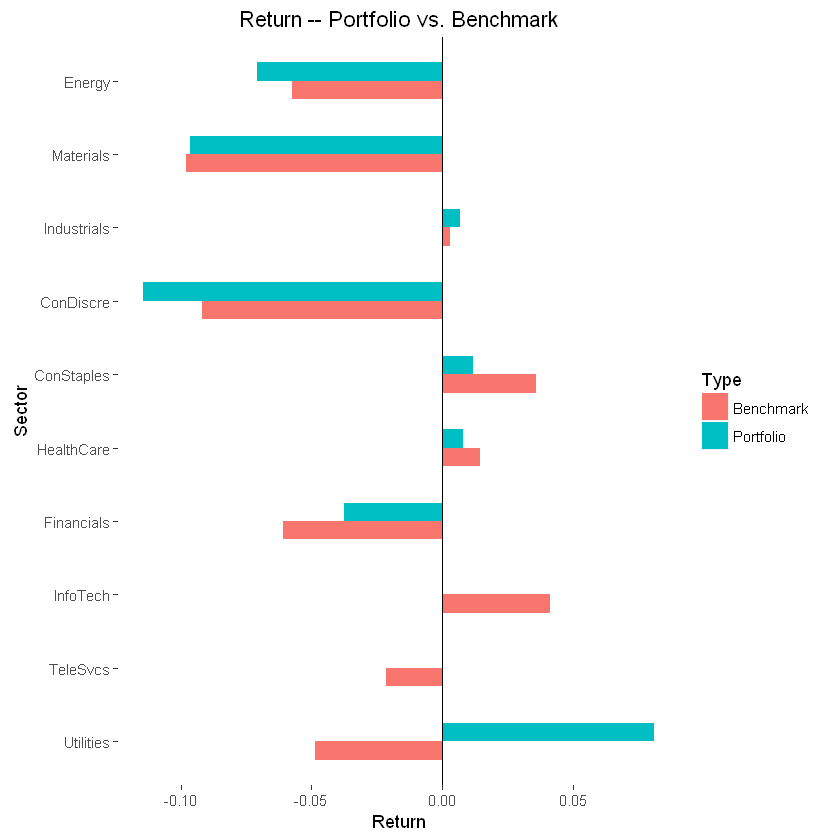

In [23]:
plot(br.single, var = "sector", type = "return")

### 3.4 Multi-Period Brinson Model

In [3]:
data(quarter)
br.multi <- brinson(quarter, 
                    date.var = "date",
                    bench.weight = "benchmark", 
                    portfolio.weight = "portfolio", 
                    ret.var = "return")

In [30]:
exposure(br.multi, var = "size")

,2010-01-01,2010-02-01,2010-03-01
Low,0.140,0.140,0.155
2,0.050,0.070,0.045
3,0.175,0.145,0.155
4,0.235,0.245,0.240
High,0.400,0.400,0.405
,2010-01-01,2010-02-01,2010-03-01
Low,0.0681,0.0568,0.0628
2,0.0122,0.0225,0.0170
3,0.126,0.138,0.114
4,0.252,0.246,0.251


In [4]:
returns(br.multi, type= "linking")

$Raw
              2010-01-01 2010-02-01 2010-03-01
Allocation       -0.0014     0.0064     0.0046
Selection         0.0146     0.0178    -0.0152
Interaction       0.0020    -0.0074    -0.0087
Active Return     0.0151     0.0168    -0.0193

$Aggregate
              2010-01-01, 2010-03-01
Allocation                    0.0095
Selection                     0.0173
Interaction                  -0.0142
Active Return                 0.0127

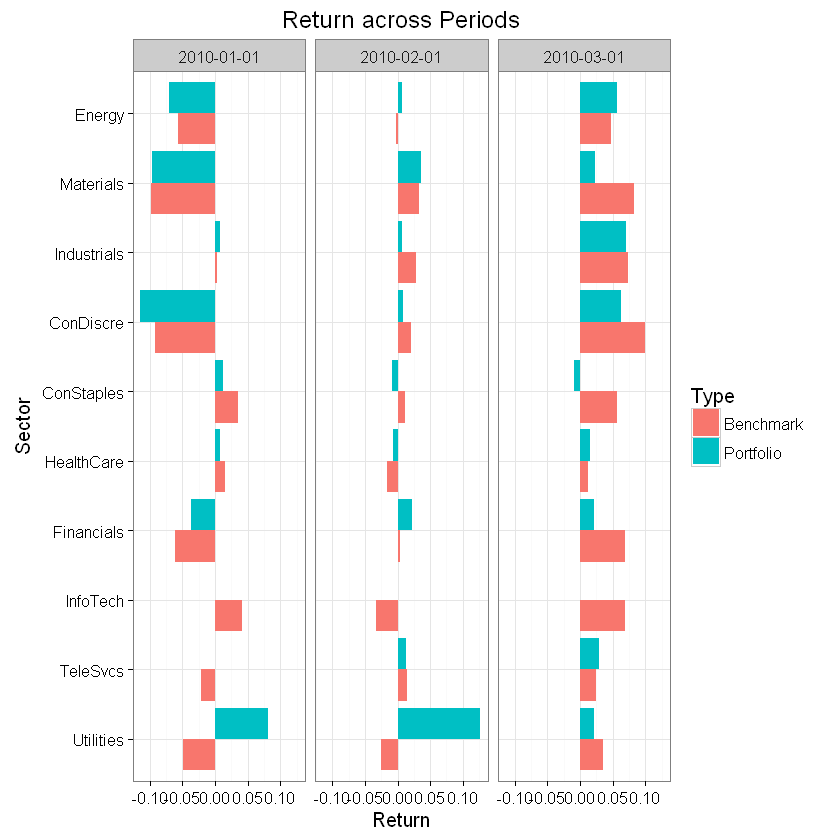

In [6]:
plot(br.multi, type = "return")

Comment:    
Utility performed the best in Jan and Feb but not so good in Mar. 2010

Franklin Ma, 11/6/2016